## ARE THE RESULTS SIGNIFICATIVE ?


Also run in Google Collab as 2.0 notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%pip install cell2cell

  Using cached cell2cell-0.7.4-py3-none-any.whl.metadata (5.3 kB)
  Using cached statannotations-0.7.2-py3-none-any.whl.metadata (7.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.2 MB/s eta 0:00:00


In [10]:
import cell2cell
import scanpy as sc


In [6]:
import pickle

with open('/content/drive/MyDrive/tfm/data/tensor_with_loadings_cell2cell_12f.pkl', 'rb') as f:
    tensor = pickle.load(f)

In [14]:
adata = sc.read_h5ad('/content/drive/MyDrive/tfm/data/homan_adata_processed_27_05.h5ad')

In [15]:
context_dict = adata.obs.sort_values(by='sample') \
                        .set_index('sample')['cell_line'] \
                        .to_dict()

In [16]:
tensor.factors.keys()

odict_keys(['Contexts', 'Ligand-Receptor Pairs', 'Sender Cells', 'Receiver Cells'])

In [19]:
fig_filename='/content/drive/MyDrive/tfm/boxplot_tensorcell2cell.png'

/usr/local/lib/python3.11/dist-packages/cell2cell/plotting/factor_plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x,
/usr/local/lib/python3.11/dist-packages/cell2cell/plotting/factor_plot.py:197: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),
/usr/local/lib/python3.11/dist-packages/cell2cell/plotting/factor_plot.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=x,
/usr/local/lib/python3.11/dist-packages/cell2cell/plotting/factor_plot.py:197: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_tick

(<Figure size 1600x1200 with 12 Axes>,
 array([[<Axes: title={'center': 'Factor 1'}, ylabel='Context Loadings'>,
         <Axes: title={'center': 'Factor 2'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 3'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 4'}, ylabel=' '>],
        [<Axes: title={'center': 'Factor 5'}, ylabel='Context Loadings'>,
         <Axes: title={'center': 'Factor 6'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 7'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 8'}, ylabel=' '>],
        [<Axes: title={'center': 'Factor 9'}, ylabel='Context Loadings'>,
         <Axes: title={'center': 'Factor 10'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 11'}, ylabel=' '>,
         <Axes: title={'center': 'Factor 12'}, ylabel=' '>]], dtype=object))

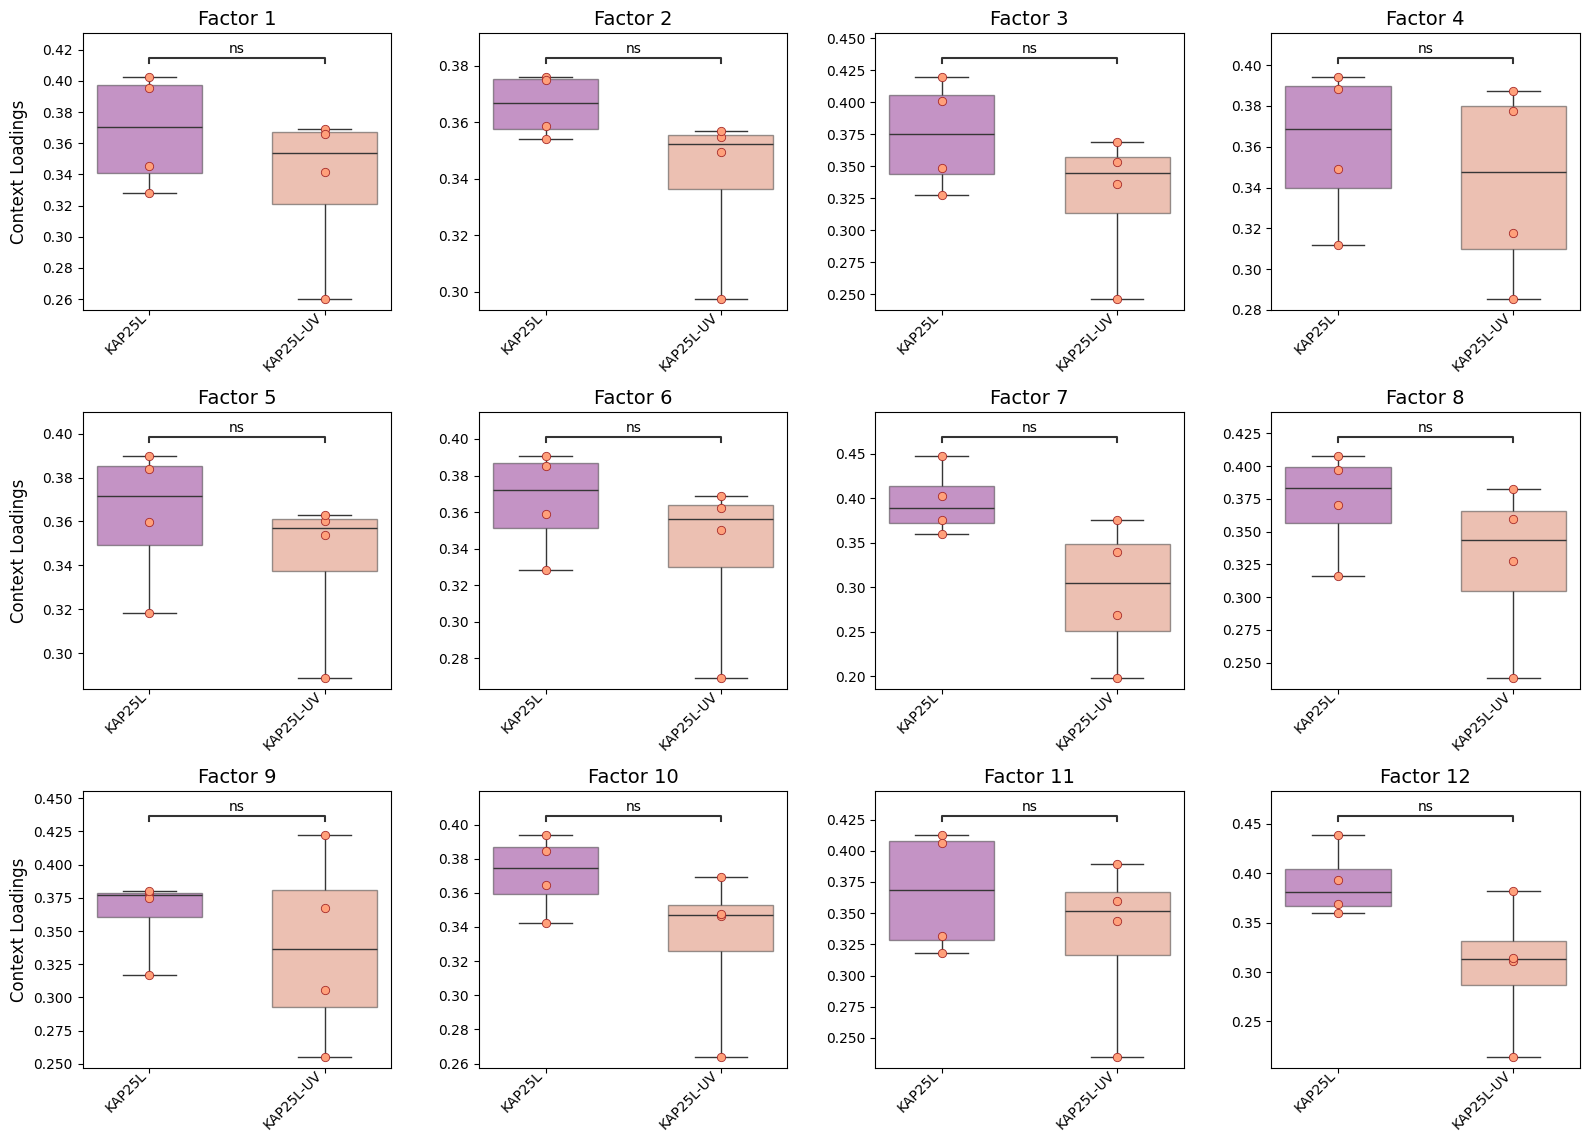

In [20]:
cell2cell.plotting.context_boxplot(context_loadings=tensor.factors['Contexts'],
                                 metadict=context_dict,
                                 nrows=3,
                                 figsize=(16, 12),
                                 statistical_test='t-test_ind',
                                 pval_correction='fdr_bh',
                                 cmap='plasma',
                                 verbose=False,
                                 filename=fig_filename
                                )